<a href="https://colab.research.google.com/github/devrangadi-h/PRCVOpticalFlow/blob/main/FlowNet_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authors: 
Arun Madhusudhanan,
Tejaswini Deore

Project for CS 5330 Pattern Recogn & Computer Vision

Title: Comparative Analysis of Optical Flow Techniques: Classical Computer Vision vs Deep Learning Approach

Description:

This is an Pytorch implementation of optical flow estimation using FlowNet 2.0. FlowNet 2.0 model is trained on a custom dataset derived from MPI-Sintel Dataset and inference is done using the pre-trained FlowNet 2.0 weights. The code also implements inference on a video file using the pre-trained FlowNet 2.0 weights and visualizes the flo files.

# Install all the dependencies and FlowNet2

In [ ]:
# Install Python 3.6
!sudo apt-get install python3.6
!sudo apt-get update -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.6 1
!sudo update-alternatives --config python3
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.6-minimal libpython3.6-stdlib python3.6-minimal
Suggested packages:
  python3.6-venv binfmt-support
The following NEW packages will be installed:
  libpython3.6-minimal libpython3.6-stdlib python3.6 python3.6-minimal
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,294 kB of archives.
After this operation, 22.1 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.6-minimal amd64 3.6.15-1+focal3 [569 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.6-minimal amd64 3.6.15-1+focal3 [1,718 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.6-stdlib amd64 3.6.15-1+focal3 [1,758 kB]
Get:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.6 amd64 3.

In [ ]:
!sudo apt install python3.6-distutils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python3.6-lib2to3
The following NEW packages will be installed:
  python3.6-distutils python3.6-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 26 not upgraded.
Need to get 308 kB of archives.
After this operation, 1,232 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.6-lib2to3 all 3.6.15-1+focal3 [122 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.6-distutils all 3.6.15-1+focal3 [187 kB]
Fetched 308 kB in 1s (250 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debc

In [ ]:
# Download compatible Torch
!pip install torch==1.0.0 torchvision==0.2.2 -f https://download.pytorch.org/whl/cu90/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu90/torch_stable.html
     |████████████████████████████████| 591.8 MB 4.3 kB/s 
Reason for being yanked: So that users won't accidentally install this when using python 3.11
     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 14.8 MB 50.6 MB/s 
     |████████████████████████████████| 3.1 MB 55.9 MB/s 
     |████████████████████████████████| 52 kB 26 kB/s 


In [ ]:
!sudo apt-get install python3.6-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.6 libpython3.6-dev
The following NEW packages will be installed:
  libpython3.6 libpython3.6-dev python3.6-dev
0 upgraded, 3 newly installed, 0 to remove and 26 not upgraded.
Need to get 5,329 kB of archives.
After this operation, 22.1 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.6 amd64 3.6.15-1+focal3 [1,396 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.6-dev amd64 3.6.15-1+focal3 [3,433 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.6-dev amd64 3.6.15-1+focal3 [501 kB]
Fetched 5,329 kB in 3s (1,841 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf

In [ ]:
!sudo apt-get install build-essential

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 26 not upgraded.


## Download and setup FlowNet2 files

In [ ]:
import os
# get flownet2-pytorch source
!git clone https://github.com/Gauravv97/flownet2-pytorch.git
!mv /content/flownet2-pytorch /content/flownet2pytorch
os.chdir('./flownet2pytorch')
# install custom layers
!bash install.sh

Cloning into 'flownet2-pytorch'...
remote: Enumerating objects: 572, done.
remote: Total 572 (delta 0), reused 0 (delta 0), pack-reused 572
Receiving objects: 100% (572/572), 6.28 MiB | 20.55 MiB/s, done.
Resolving deltas: 100% (323/323), done.
running install
running bdist_egg
running egg_info
creating correlation_cuda.egg-info
writing correlation_cuda.egg-info/PKG-INFO
writing dependency_links to correlation_cuda.egg-info/dependency_links.txt
writing top-level names to correlation_cuda.egg-info/top_level.txt
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
reading manifest file 'correlation_cuda.egg-info/SOURCES.txt'
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
building 'correlation_cuda' extension
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-se

### Add packages to IPython system path

In [ ]:
import os
os.sys.path.append('/root/.local/lib/python3.6/site-packages/resample2d_cuda-0.0.0-py3.6-linux-x86_64.egg')
os.sys.path.append('/root/.local/lib/python3.6/site-packages/correlation_cuda-0.0.0-py3.6-linux-x86_64.egg')
os.sys.path.append( '/root/.local/lib/python3.6/site-packages/channelnorm_cuda-0.0.0-py3.6-linux-x86_64.egg')

# Download files and Install Packages

In [ ]:
# Download pre-trained weights for FlowNet2 from Google Drive
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1z7ILMj_JhtOrDk62AHIUQbHvQLbCLFDK',dest_path='./FlowNet2_checkpoint.pth.tar')

In [ ]:
# Mount Google Drive to access the files and folders inside it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Copy the custom dataset from drive into the root directory of the Colab VM 
!cp /content/drive/MyDrive/scripts.zip /content/

In [ ]:
# Unzip the downloaded dataset
!unzip /content/scripts.zip

Archive:  /content/scripts.zip
   creating: scripts/
  inflating: scripts/change_names_test.py  
  inflating: scripts/separate_images.py  
   creating: scripts/train/
   creating: scripts/train/flow/
   creating: scripts/train/flow/mountain_1/
  inflating: scripts/train/flow/mountain_1/frame_0001.flo  
  inflating: scripts/train/flow/mountain_1/frame_0002.flo  
  inflating: scripts/train/flow/mountain_1/frame_0003.flo  
  inflating: scripts/train/flow/mountain_1/frame_0004.flo  
  inflating: scripts/train/flow/mountain_1/frame_0005.flo  
  inflating: scripts/train/flow/mountain_1/frame_0006.flo  
  inflating: scripts/train/flow/mountain_1/frame_0007.flo  
  inflating: scripts/train/flow/mountain_1/frame_0008.flo  
  inflating: scripts/train/flow/mountain_1/frame_0009.flo  
  inflating: scripts/train/flow/mountain_1/frame_0010.flo  
  inflating: scripts/train/flow/mountain_1/frame_0011.flo  
  inflating: scripts/train/flow/mountain_1/frame_0012.flo  
  inflating: scripts/train/flow/moun

In [ ]:
!cp /content/drive/MyDrive/Ambush-2_updated.zip /content

In [ ]:
!unzip /content/Ambush-2_updated.zip

Archive:  /content/Ambush-2_updated.zip
   creating: Ambush-2/
  inflating: Ambush-2/frame_0001.flo  
  inflating: Ambush-2/frame_0002.flo  
  inflating: Ambush-2/frame_0003.flo  
  inflating: Ambush-2/frame_0004.flo  
  inflating: Ambush-2/frame_0005.flo  
  inflating: Ambush-2/frame_0006.flo  


In [ ]:
!rm -rf /content/flownet2pytorch/scripts/test/flow/ambush_2

In [ ]:
!rm -rf /content/flownet2pytorch/scripts/train/flow/ambush_2/frame_0014.flo

In [ ]:
!pip install pypng
!pip install tensorboardx
!pip install  setproctitle colorama scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 2.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.0 MB/s 
     |████████████████████████████████| 40 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 36.1 MB/s 
     |████████████████████████████████| 98 kB 8.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 61.3 MB/s 


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 4.9 MB/s 
     |████████████████████████████████| 247 kB 76.4 MB/s 
     |████████████████████████████████| 1.1 MB 57.3 MB/s 


In [ ]:
!pip install pytz ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 502 kB 4.8 MB/s 
     |████████████████████████████████| 121 kB 50.0 MB/s 
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 783 kB 23.6 MB/s 
     |████████████████████████████████| 427 kB 49.2 MB/s 
     |████████████████████████████████| 130 kB 49.5 MB/s 
     |████████████████████████████████| 1.1 MB 11.0 MB/s 
     |████████████████████████████████| 386 kB 56.2 MB/s 
     |████████████████████████████████| 1.4 MB 49.2 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 1.1 MB 50.7 MB/s 
     |████████████████████████████████| 86 kB 6.6 MB/s 
     |████████████████████████████████| 109 kB 66.4 MB/s 


In [ ]:
!pip install scipy==1.1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Train and test the FlowNet2 Model using custom dataset
Before training, replace the 'main.py' and 'losses.py' provided by the authors of FlowNet 2.0 with the 'main.py' and 'losses.py' provided in our github repository. 

Before testing, uncomment the line 47 to 49 in datasets.py.

In [ ]:
# Train
!python main.py --batch_size 8 --model FlowNet2 --loss=L1Loss --optimizer=Adam --optimizer_lr=1e-4  --training_dataset MpiSintelFinal --training_dataset_root /content/flownet2pytorch/scripts/train  --validation_dataset MpiSintelClean --validation_dataset_root /content/flownet2pytorch/scripts/train --total_epochs 70 --save /content/

### Calculate and plot losses

In [ ]:
import numpy as np

def calculate_loss_averages(file_path):
    '''
    Method to get average losses for each epoch from a text file.
    :param file_path: The path to the text file containing the losses
    :return: A numpy array containing the average losses for each epoch
    '''
    # Read the data from file
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)

    # Get the unique epoch values
    epochs = np.unique(data[:, 0])

    # Initialize an empty list to store the averages
    averages = []

    # Loop through the epochs and calculate the average errors
    for epoch in epochs:
        epoch_data = data[data[:, 0] == epoch]
        errors = epoch_data[:, 2:4]
        epoch_average = np.mean(errors, axis=0)
        averages.append(epoch_average)

    # Return the averages
    return np.array(averages)



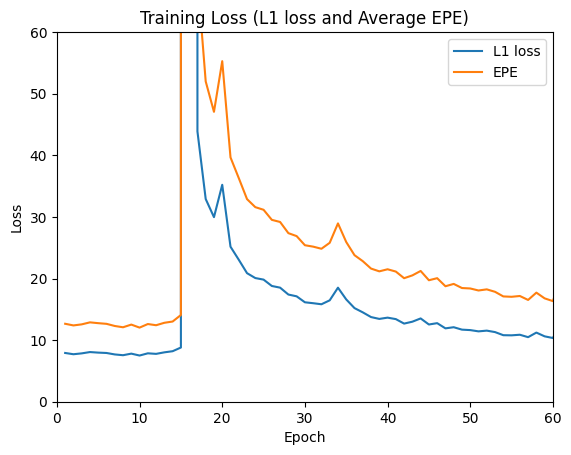

In [ ]:
# Plot the Training losses

import matplotlib.pyplot as plt

# Get the array of average losses from file containing training losses
averages = calculate_loss_averages('/content/flownet2pytorch/training_loss_values.txt')

# Extract values for L1 loss and EPE
x = np.arange(1, len(averages) + 1)
l1_loss = averages[:, 0]
epe = averages[:, 1]

# Create a line plot for L1 loss
plt.plot(x, l1_loss, label='L1 loss')

# Create a line plot for EPE
plt.plot(x, epe, label='EPE')

# Add axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss (L1 loss and Average EPE)')

# Set the y-axis limits
plt.ylim(0, 60)

# Set the x-axis limits
plt.xlim(0, 60)

# Add a legend
plt.legend()

# Display the plot
plt.show()



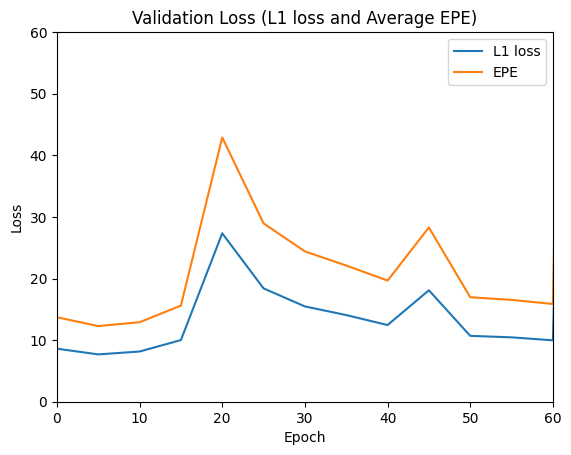

In [ ]:
# Plot the Validation losses

import matplotlib.pyplot as plt

# Get the array of average losses from file containing validation losses
val_averages = calculate_loss_averages('/content/flownet2pytorch/validation_loss_values.txt')

# Extract values for L1 loss and EPE
x = np.arange(len(val_averages))
l1_loss = val_averages[:, 0]
epe = val_averages[:, 1]

# Create a line plot for L1 loss
plt.plot(x*5, l1_loss, label='L1 loss')

# Create a line plot for EPE
plt.plot(x*5, epe, label='EPE')

# Add axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss (L1 loss and Average EPE)')

# Set the y-axis limits
plt.ylim(0, 60)

# Set the x-axis limits
plt.xlim(0, 60)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
!python main.py --inference --model FlowNet2 --save_flow --save ./output --inference_dataset ImagesFromFolder --inference_dataset_root /content/flownet2pytorch/scripts/test --resume /content/drive/MyDrive/FlowNet2_checkpoint.pth.tar

In [ ]:
def count_files(directory):
    '''
    Method to count the number of files in a directory and its subdirectories.
    :param directory: The directory to count the files in.
    :return: A NumPy array containing the cumulative sum of the file counts for each subdirectory.
    '''
    # initialize an empty array to store the file counts
    file_counts = []
    
    # iterate through the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        # initialize the file count for this subdirectory to zero
        subdirectory_file_count = 0
        
        # iterate through the files in the current directory
        for file in files:
            # add 1 to the counter if the file is not a hidden file
            if not file.startswith('.'):
                subdirectory_file_count += 1
            if file.startswith('.'):
                print(file)
        
        # append the file count for this subdirectory to the array
        if subdirectory_file_count > 0:
          file_counts.append(subdirectory_file_count)
    
    # calculate the cumulative sum of the file counts using NumPy
    file_counts_cumulative = np.cumsum(file_counts)
    
    # return the array of cumulative file counts as a NumPy array
    return np.array(file_counts_cumulative)



In [ ]:
directory = '/content/flownet2pytorch/scripts/test/flow'
indices = count_files(directory)
print(indices)

[ 14  28  42  56  70  84  98 112 126 132 146 155 169 174 188 202 213 227
 241 255 269 283 297]


In [ ]:
import numpy as np

# Read the data from file
data = np.genfromtxt('loss_values.txt', delimiter=',', skip_header=1)

# Split the data into groups defined by the array `indices`
groups = np.split(data, indices)

# Calculate the mean and max for each group and remove the first column
means = [np.mean(g, axis=0)[1:] for g in groups]
maxes = [np.max(g, axis=0)[1:] for g in groups]

# Define a dictionary to map group names to folder names
group_names = {
    'group1': 'alley_1',
    'group2': 'alley_2',
    'group3': 'ambush_2',
    'group4': 'ambush_4',
    'group5': 'ambush_5',
    'group6': 'ambush_6',
    'group7': 'ambush_7',
    'group8': 'bamboo_1',
    'group9': 'bamboo_2',
    'group10': 'bandage_1',
    'group11': 'bandage_2',
    'group12': 'cave_2',
    'group13': 'cave_4',
    'group14': 'market_2',
    'group15': 'market_5',
    'group16': 'market_6',
    'group17': 'mountain_1',
    'group18': 'shaman_2',
    'group19': 'shaman_3',
    'group20': 'sleeping_1',
    'group21': 'sleeping_2',
    'group22': 'temple_2',
    'group23': 'temple_3'
}

# Print the results
for i, (mean, max_value) in enumerate(zip(means, maxes)):
    group_name = 'group{}'.format(i+1)
    folder_name = group_names[group_name]
    print('Results for {}:'.format(folder_name))
    print('\tMean: {}'.format(mean))
    print('\tMax: {}'.format(max_value))


Results for alley_1:
	Mean: [0.09235714 0.14757143 2.23964286]
	Max: [0.133 0.212 2.547]
Results for alley_2:
	Mean: [0.15242857 0.2445     2.27871429]
	Max: [0.171 0.275 2.5  ]
Results for ambush_2:
	Mean: [1.21457143 2.20242857 2.67114286]
	Max: [1.261 2.323 2.856]
Results for ambush_4:
	Mean: [1.50128571 2.59935714 3.47771429]
	Max: [1.995 3.373 3.947]
Results for ambush_5:
	Mean: [2.32835714 3.874      4.32542857]
	Max: [2.458 4.092 5.004]
Results for ambush_6:
	Mean: [2.0365     3.37185714 5.16221429]
	Max: [2.201 3.646 5.22 ]
Results for ambush_7:
	Mean: [1.78471429 2.95121429 5.09521429]
	Max: [1.877 3.105 5.157]
Results for bamboo_1:
	Mean: [1.67378571 2.75171429 5.28764286]
	Max: [1.724 2.841 5.356]
Results for bamboo_2:
	Mean: [1.51635714 2.49064286 5.68935714]
	Max: [1.584 2.602 6.102]
Results for bandage_1:
	Mean: [1.4095     2.31466667 6.26766667]
	Max: [1.435 2.357 6.405]
Results for bandage_2:
	Mean: [1.37557143 2.25292857 6.17328571]
	Max: [1.406 2.305 6.386]
Results fo

# Run the inference on a video

### Upload your own video named video.mp4 to perform inference

In [ ]:
# Copy the video to perform inference from drive into the root directory of the Colab VM 
!cp /content/drive/MyDrive/video.mp4 /content/

### Converting video to frames

In [ ]:
import os
# Method to create a directory
def mkdir_ifnotexists(dir):
    if os.path.exists(dir):
        return
    os.mkdir(dir)

In [ ]:
# Path to video file uploaded to perform inference
vid_file='/content/video.mp4'

# Create path to store converted frames
frame_pth='./frames'
mkdir_ifnotexists(frame_pth)

# Convert video to frames and save as images to given path
cmd = "ffmpeg -i %s -start_number 0 -vsync 0 %s/frame_%%06d.png" % (
            vid_file,
            frame_pth,
        )
os.system(cmd)

0

### Generate .flo files using FlowNet2
Perform inference on frames from video file using the pre-trained weight

In [ ]:
!python main.py --inference --model FlowNet2 --save_flow --save ./output --inference_dataset ImagesFromFolder --inference_dataset_root ./frames --resume /content/drive/MyDrive/FlowNet2_checkpoint.pth.tar

# Visualizing flo files

### Install scipy as some tensorflow functionality requires updated scipy

In [ ]:
!pip install scipy==1.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


In [ ]:
os.chdir('/content/flownet2pytorch')

### Define show_flow() for visualization.
 Original Source https://github.com/sampepose/flownet2-tf/blob/master/src/flowlib.py

In [ ]:
# Source:https://github.com/sampepose/flownet2-tf/blob/master/src/flowlib.py
import matplotlib.pyplot as plt
import numpy as np

UNKNOWN_FLOW_THRESH = 1e7
def show_flow(filename):
    """
    visualize optical flow map using matplotlib
    :param filename: optical flow file
    :return: None
    """
    flow = read_flow(filename)
    img = flow_to_image(flow)
    plt.imshow(img)
    plt.show()

def read_flow(filename):
    """
    read optical flow from Middlebury .flo file
    :param filename: name of the flow file
    :return: optical flow data in matrix
    """
    f = open(filename, 'rb')
    magic = np.fromfile(f, np.float32, count=1)
    data2d = None

    if 202021.25 != magic:
        print ('Magic number incorrect. Invalid .flo file')
    else:
        w = int(np.fromfile(f, np.int32, count=1)[0])
        h = int(np.fromfile(f, np.int32, count=1)[0])
        #print("Reading %d x %d flo file" % (h, w))
        data2d = np.fromfile(f, np.float32, count=2 * w * h)
        # reshape data into 3D array (columns, rows, channels)
        data2d = np.resize(data2d, (h, w, 2))
    f.close()
    return data2d

def flow_to_image(flow):
    """
    Convert flow into middlebury color code image
    :param flow: optical flow map
    :return: optical flow image in middlebury color
    """
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    maxu = -999.
    maxv = -999.
    minu = 999.
    minv = 999.

    idxUnknow = (abs(u) > UNKNOWN_FLOW_THRESH) | (abs(v) > UNKNOWN_FLOW_THRESH)
    u[idxUnknow] = 0
    v[idxUnknow] = 0

    maxu = max(maxu, np.max(u))
    minu = min(minu, np.min(u))

    maxv = max(maxv, np.max(v))
    minv = min(minv, np.min(v))

    rad = np.sqrt(u ** 2 + v ** 2)
    maxrad = max(-1, np.max(rad))

    #print( "max flow: %.4f\nflow range:\nu = %.3f .. %.3f\nv = %.3f .. %.3f" % (maxrad, minu,maxu, minv, maxv))

    u = u/(maxrad + np.finfo(float).eps)
    v = v/(maxrad + np.finfo(float).eps)

    img = compute_color(u, v)

    idx = np.repeat(idxUnknow[:, :, np.newaxis], 3, axis=2)
    img[idx] = 0

    return np.uint8(img)


def compute_color(u, v):
    """
    compute optical flow color map
    :param u: optical flow horizontal map
    :param v: optical flow vertical map
    :return: optical flow in color code
    """
    [h, w] = u.shape
    img = np.zeros([h, w, 3])
    nanIdx = np.isnan(u) | np.isnan(v)
    u[nanIdx] = 0
    v[nanIdx] = 0

    colorwheel = make_color_wheel()
    ncols = np.size(colorwheel, 0)

    rad = np.sqrt(u**2+v**2)

    a = np.arctan2(-v, -u) / np.pi

    fk = (a+1) / 2 * (ncols - 1) + 1

    k0 = np.floor(fk).astype(int)

    k1 = k0 + 1
    k1[k1 == ncols+1] = 1
    f = fk - k0

    for i in range(0, np.size(colorwheel,1)):
        tmp = colorwheel[:, i]
        col0 = tmp[k0-1] / 255
        col1 = tmp[k1-1] / 255
        col = (1-f) * col0 + f * col1

        idx = rad <= 1
        col[idx] = 1-rad[idx]*(1-col[idx])
        notidx = np.logical_not(idx)

        col[notidx] *= 0.75
        img[:, :, i] = np.uint8(np.floor(255 * col*(1-nanIdx)))

    return img


def make_color_wheel():
    """
    Generate color wheel according Middlebury color code
    :return: Color wheel
    """
    RY = 15
    YG = 6
    GC = 4
    CB = 11
    BM = 13
    MR = 6

    ncols = RY + YG + GC + CB + BM + MR

    colorwheel = np.zeros([ncols, 3])

    col = 0

    # RY
    colorwheel[0:RY, 0] = 255
    colorwheel[0:RY, 1] = np.transpose(np.floor(255*np.arange(0, RY) / RY))
    col += RY

    # YG
    colorwheel[col:col+YG, 0] = 255 - np.transpose(np.floor(255*np.arange(0, YG) / YG))
    colorwheel[col:col+YG, 1] = 255
    col += YG

    # GC
    colorwheel[col:col+GC, 1] = 255
    colorwheel[col:col+GC, 2] = np.transpose(np.floor(255*np.arange(0, GC) / GC))
    col += GC

    # CB
    colorwheel[col:col+CB, 1] = 255 - np.transpose(np.floor(255*np.arange(0, CB) / CB))
    colorwheel[col:col+CB, 2] = 255
    col += CB

    # BM
    colorwheel[col:col+BM, 2] = 255
    colorwheel[col:col+BM, 0] = np.transpose(np.floor(255*np.arange(0, BM) / BM))
    col += + BM

    # MR
    colorwheel[col:col+MR, 2] = 255 - np.transpose(np.floor(255 * np.arange(0, MR) / MR))
    colorwheel[col:col+MR, 0] = 255

    return colorwheel

### Visualize

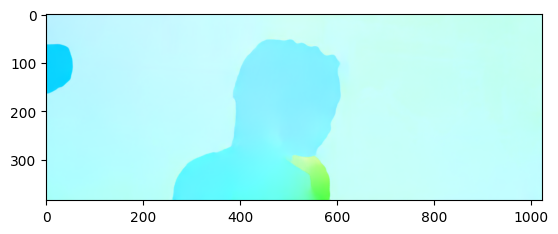

In [ ]:
# Visualize .flo file
show_flow('/content/flownet2pytorch/work/inference/run.epoch-0-flow-field/000000.flo')

### Save Flo files as images

In [ ]:
import os
import PIL.Image

# Method to create a directory if it doesn't exist
def mkdir_ifnotexists(dir):
    if os.path.exists(dir):
        return
    os.mkdir(dir)

# Directory containing the flow files
flo_pth='/content/flownet2pytorch/work/inference/run.epoch-0-flow-field/'

# Get a list of all the flow files
flos=[flo_pth + f for f in os.listdir(flo_pth)]
mkdir_ifnotexists('./FlowFrames')

# Loop over the flow files, convert them to images, and save them in the FlowFrames directory
for i in range(len(flos)):
 PIL.Image.fromarray(flow_to_image(read_flow(flos[i]))).save('./FlowFrames/'+os.path.basename(flos[i])+'.png')

### Generate video from Flo

In [ ]:
os.system('ffmpeg -r 24 -i FlowFrames/%6d.flo.png -vcodec libx264 -b 10M -y FlowVideo.mp4  ')

0

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Read in the FlowVideo.mp4 file  and encode it in base64 format
mp4 = open('FlowVideo.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Display the video in a player
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)